In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load cleaned dataset:
vg_sales = pd.read_csv('./dataset/vg_sales_cleaned.csv', index_col=0)

In [3]:
vg_sales.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN


## EDA on Video Games Sales

**FOCUS:**

**Video Game Trend**
- How is the trend for video games increase for the past years?

In [4]:
vg_sales['Year_of_Release'] = vg_sales['Year_of_Release'].astype(np.int)

In [5]:
vg_sales.Year_of_Release.describe()

count    16719.000000
mean      2006.464143
std          5.897407
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: Year_of_Release, dtype: float64

* The max value of 2020 is kinda wrong as this data was scraped in 2016 so there's should be no games at least greater than 2017.
* Looking at this data, I found (by a quick search on google) that this game was actually released on 2009.
* So I instead used this fact to change the year of release of this game:

In [6]:
# Checking the game with a 2020 year release:
vg_sales[vg_sales.Year_of_Release == 2020]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
5936,Imagine: Makeup Artist,DS,2020,Simulation,Ubisoft,0.27,0.0,0.0,0.02,0.29,NaN,NaN,NaN,NaN,E


In [7]:
# Imagine: Makeup Artist was actually released on 12/05/2009:
vg_sales.loc[5936, 'Year_of_Release'] = 2009

In [8]:
# Looking at the updated statistics:
vg_sales['Year_of_Release'].describe()

count    16719.000000
mean      2006.463485
std          5.896511
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2017.000000
Name: Year_of_Release, dtype: float64

* Now we can see here that the record sales started on 1980 to 2017.

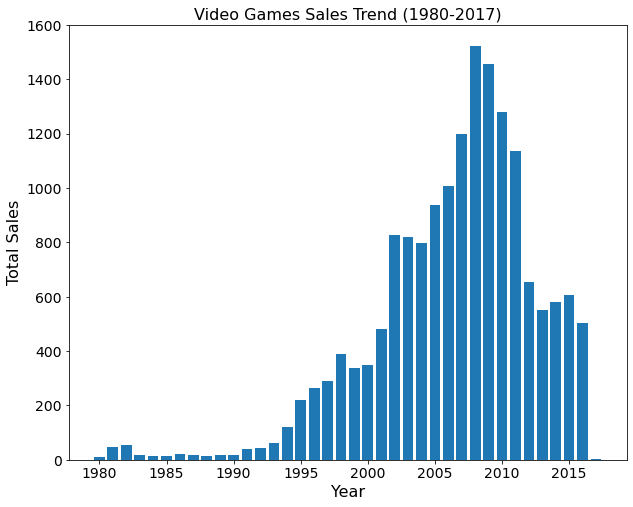

In [9]:
# Looking at the sales trend since 1980 to 2017:
year_sales_counts = vg_sales['Year_of_Release'].value_counts()
year_sales_counts = year_sales_counts.sort_index()

fig, ax = plt.subplots(figsize=(10,8))
ax.bar(year_sales_counts.index, year_sales_counts.values)
ax.set_title('Video Games Sales Trend (1980-2017)', fontsize=16)
ax.set_xlabel('Year', fontsize=16)
ax.set_ylabel('Total Sales', fontsize=16)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)

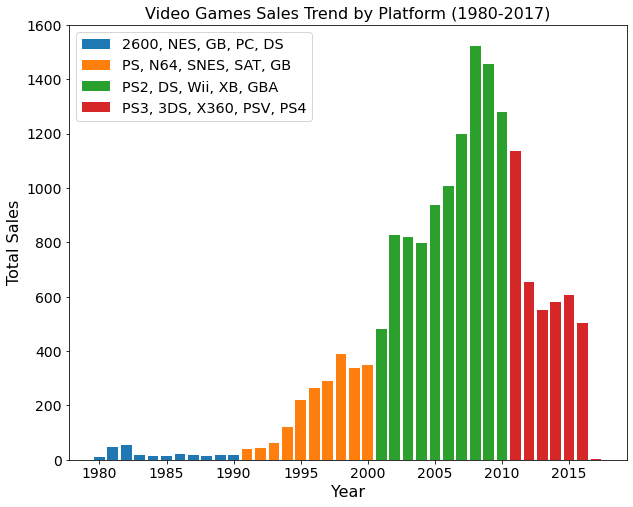

In [10]:
def get_modal_platform(year_range):
    year_range_record = vg_sales[vg_sales.Year_of_Release.isin(year_range)]
    return year_range_record['Platform'].value_counts().index[:5]

fig, ax = plt.subplots(figsize=(10,8))
start, end = 1980, 1990
for i in range(4):
    modal_platform = ', '.join(get_modal_platform(range(start, end)))
    ax.bar(year_sales_counts.loc[start:end].index, 
           year_sales_counts.loc[start:end].values, 
           label=modal_platform)
    start = end + 1
    end = end + 10

ax.set_title('Video Games Sales Trend by Platform (1980-2017)', fontsize=16)
ax.set_xlabel('Year', fontsize=16)
ax.set_ylabel('Total Sales', fontsize=16)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
ax.legend(fontsize='x-large')

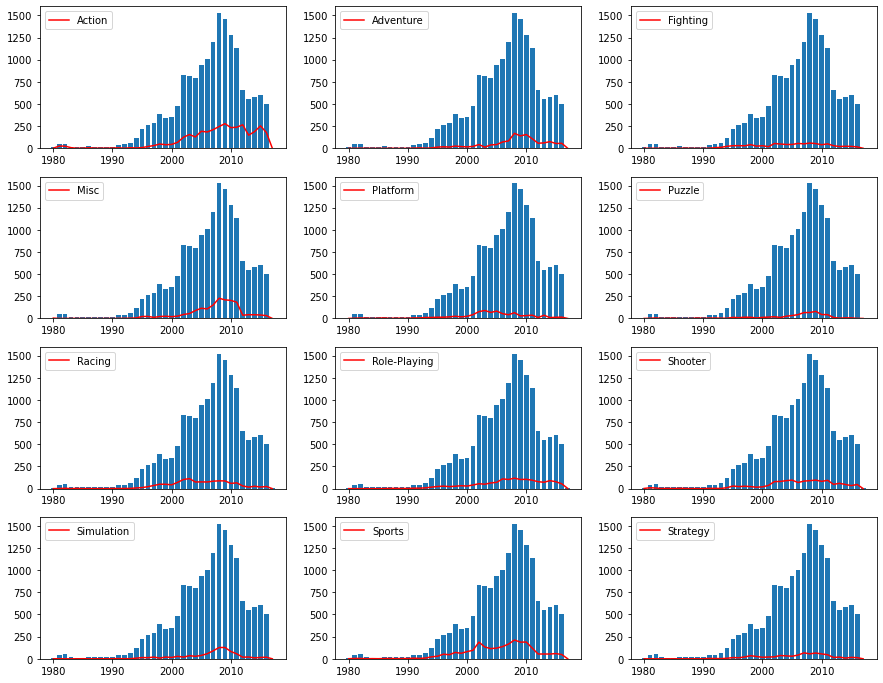

In [69]:
res = pd.crosstab(vg_sales['Year_of_Release'], vg_sales['Genre'])
fig, axes = plt.subplots(4, 3, figsize=(15, 12))
col = 0
for i in range(4):
    for j in range(3):
        genre_rec = res.iloc[:, col]
        axes[i, j].bar(year_sales_counts.index, year_sales_counts.values)
        axes[i, j].plot(genre_rec, label=genre_rec.name, color='red')
        _ = axes[i, j].legend(loc='upper left')
        col += 1

In [70]:
vg_sales.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,E
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,E
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN
